In [1]:
import numpy as np #import thư viện numpy để tính toán các phép toán trên ma trận
import cv2 #import thư viện cv2 để xử lý ảnh
import matplotlib.pyplot as plt #import thư viện matplotlib để vẽ đồ thị
import tensorflow as tf #import thư viện tensorflow để xây dựng mô hình

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array #import thư viện load_img và img_to_array để load ảnh và chuyển ảnh thành ma trận

In [3]:
# load model
model = tf.keras.models.load_model('../3_WebApp/static/models/object_detection_new.h5') #load model đã train
print('model loaded sucessfully')

model loaded sucessfully


In [4]:
path = '../2_Train_Object_Detection_model/test_imgs_for_h5new/9297.jpg' #đường dẫn ảnh
image = load_img(path) # PIL object #load ảnh
image = np.array(image,dtype=np.uint8) # 8 bit array (0,255) #chuyển ảnh thành ma trận
image1 = load_img(path,target_size=(224,224)) #load ảnh với kích thước 224x224, 224x224 là kích thước mà model train
image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output #chuyển ảnh thành ma trận và chuẩn hóa giá trị thành 0-1

In [5]:
# size of the orginal image
h,w,d = image.shape #lấy kích thước ảnh gồm chiều cao, chiều rộng và số kênh màu
print('Height of the image =',h) #in ra chiều cao ảnh
print('Width of the image =',w) #in ra chiều rộng ảnh

Height of the image = 303
Width of the image = 472


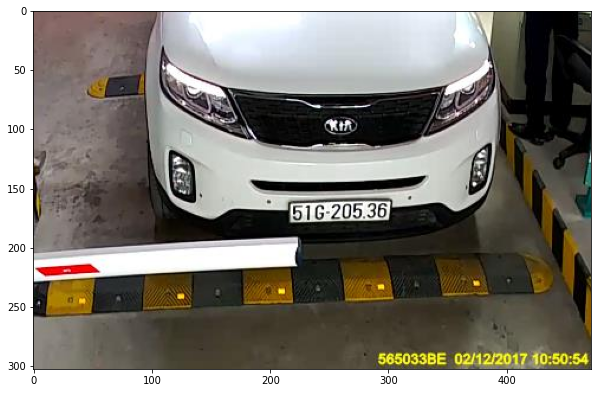

In [6]:
plt.figure(figsize=(10,8)) #tạo 1 figure với kích thước 10x8
plt.imshow(image) #vẽ ảnh
plt.show() #hiển thị ảnh

In [7]:
image_arr_224.shape #in ra hình dạng của ma trận ảnh gồm 224x224x3, 224x224 là kích thước ảnh, 3 là số kênh màu

(224, 224, 3)

In [8]:
test_arr = image_arr_224.reshape(1,224,224,3) #reshape ma trận ảnh thành 1x224x224x3, 1 là số ảnh, 224x224 là kích thước ảnh, 3 là số kênh màu
test_arr.shape #in ra hình dạng của ma trận ảnh

(1, 224, 224, 3)

In [9]:
# make predictions, đưa ra dự đoán
coords = model.predict(test_arr) #dự đoán vị trí của object
coords #in ra vị trí của object, có dạng mảng [xmin, xmax, ymin, ymax], giá trị của các phần tử trong mảng nằm trong khoảng 0-1

1/1 [==============================] - 3s 3s/step


array([[0.4551919, 0.6387174, 0.5217204, 0.5959574]], dtype=float32)

In [10]:
# denormalize the values, chuyển lại giá trị vị trí bounding box về kích thước ảnh gốc
denorm = np.array([w,w,h,h]) #tạo 1 mảng gồm 4 phần tử, 2 phần tử đầu là chiều rộng ảnh, 2 phần tử sau là chiều cao ảnh
coords = coords * denorm #nhân ma trận vị trí của object với ma trận kích thước ảnh gốc để chuyển vị trí về kích thước ảnh gốc
coords

array([[214.85058165, 301.47461891, 158.08128405, 180.57509172]])

In [11]:
coords = coords.astype(np.int32) #chuyển giá trị vị trí bounding box về dạng số nguyên
coords

array([[214, 301, 158, 180]])

(214, 158) (301, 180)


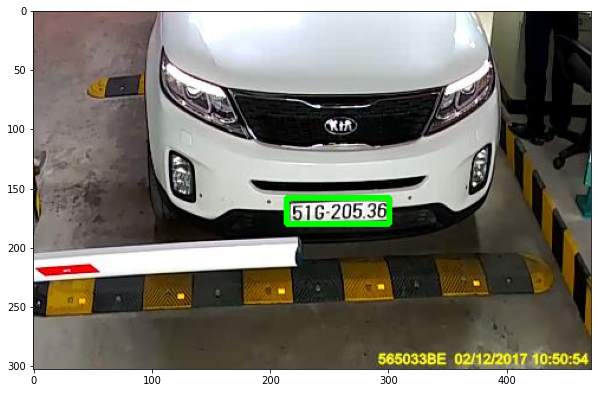

In [12]:
# draw bounding on top the image, vẽ bounding box lên ảnh
xmin, xmax,ymin,ymax = coords[0] #lấy ra giá trị vị trí bounding box
pt1 =(xmin,ymin) #điểm trái dưới bounding box
pt2 =(xmax,ymax) #điểm phải trên bounding box
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3) #vẽ bounding box lên ảnh, 0,255,0 là màu xanh lá cây, 3 là độ dày của đường viền

plt.figure(figsize=(10,8)) #tạo 1 figure với kích thước 10x8
plt.imshow(image) #vẽ ảnh
plt.show() #hiển thị ảnh

In [13]:
# create pipeline, chuyển quá trình bên trên thành 1 hàm
path = '../2_Train_Object_Detection_model/imgs/12244.jpg'
#Hàm object_detection() nhận vào đường dẫn của ảnh, đọc ảnh, dự đoán vị trí của object, vẽ bounding box lên ảnh và trả về ảnh đã vẽ bounding box
def object_detection(path):
    # read image
    image = load_img(path) # PIL object #đọc ảnh
    image = np.array(image,dtype=np.uint8) # 8 bit array (0,255) #chuyển ảnh thành ma trận
    image1 = load_img(path,target_size=(224,224)) #đọc ảnh với kích thước 224x224
    # data preprocessing, tiền xử lý dữ liệu ảnh muốn dự đoán
    image_arr_224 = img_to_array(image1)/255.0  # convert into array and get the normalized output #chuyển ảnh thành ma trận và chuẩn hóa giá trị của các phần tử trong ma trận về khoảng 0-1
    h,w,d = image.shape #lấy chiều cao, chiều rộng, số kênh màu của ảnh
    test_arr = image_arr_224.reshape(1,224,224,3) #reshape ma trận ảnh thành 1x224x224x3, 1 là số ảnh, 224x224 là kích thước ảnh, 3 là số kênh màu
    # make predictions, tiến hành dự đoán
    coords = model.predict(test_arr) #dự đoán vị trí của object (object ở đây là biển số xe)
    # denormalize the values, chuyển lại giá trị vị trí bounding box về kích thước ảnh gốc
    denorm = np.array([w,w,h,h]) #tạo 1 mảng gồm 4 phần tử, 2 phần tử đầu là chiều rộng ảnh, 2 phần tử sau là chiều cao ảnh
    coords = coords * denorm #nhân ma trận vị trí của object với ma trận kích thước ảnh gốc để chuyển vị trí về kích thước ảnh gốc
    coords = coords.astype(np.int32) #chuyển giá trị vị trí bounding box về dạng số nguyên
    # draw bounding on top the image, vẽ bounding box lên ảnh
    xmin, xmax,ymin,ymax = coords[0] #lấy ra giá trị vị trí bounding box
    pt1 =(xmin,ymin) #điểm trái trên bounding box
    pt2 =(xmax,ymax) #điểm phải dưới bounding box
    print(pt1, pt2) #in ra vị trí bounding box
    cv2.rectangle(image,pt1,pt2,(0,255,0),3) #vẽ bounding box lên ảnh, 0,255,0 là màu xanh lá cây, 3 là độ dày của đường viền
    return image, coords #trả về ảnh đã vẽ bounding box và vị trí bounding box

1/1 [==============================] - 0s 137ms/step
(214, 158) (301, 180)


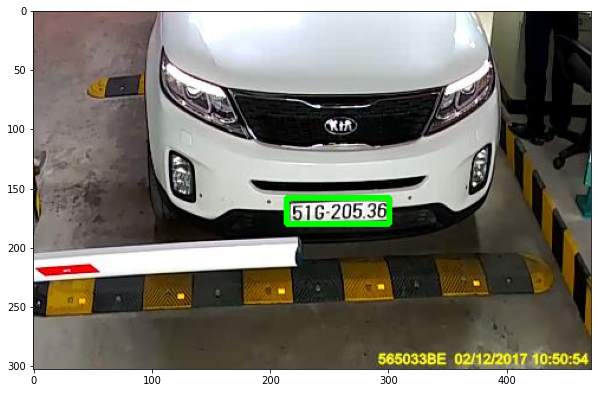

In [14]:
path = '../2_Train_Object_Detection_model/test_imgs_for_h5new/9297.jpg'
image, cods = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

# Optical Character Recognition - OCR

In [15]:
import pytesseract as pt #import thư viện pytesseract

1/1 [==============================] - 0s 122ms/step
(214, 158) (301, 180)


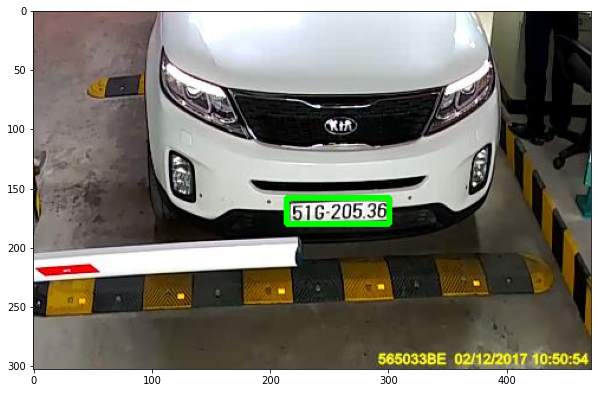

In [17]:
path = '../2_Train_Object_Detection_model/test_imgs_for_h5new/9297.jpg' #đường dẫn ảnh muốn nhận diện biển số xe
image, cods = object_detection(path) #dự đoán vị trí biển số xe, trả về ảnh đã vẽ bounding box và vị trí bounding box

plt.figure(figsize=(10,8)) #tạo 1 figure có kích thước 10x8
plt.imshow(image) #vẽ ảnh đã vẽ bounding box lên figure
plt.show() #hiển thị figure

In [18]:
img = np.array(load_img(path)) #đọc ảnh và chuyển ảnh thành ma trận
xmin ,xmax,ymin,ymax = cods[0] #lấy ra vị trí bounding box
roi = img[ymin:ymax,xmin:xmax] #cắt ảnh theo vị trí bounding box

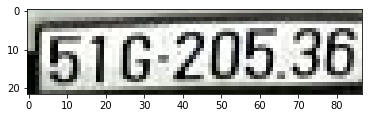

In [19]:
plt.imshow(roi) #vẽ ảnh đã cắt lên figure
plt.show() #hiển thị figure

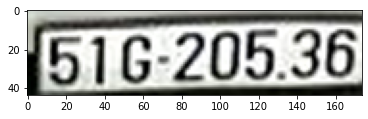

In [25]:
# resize the image, thay đổi kích thước ảnh, tăng kích thước lên 2 lần cả chiều rộng và chiều cao
resize_test_license_plate = cv2.resize(roi, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)
plt.imshow(resize_test_license_plate) #vẽ ảnh đã resize lên figure
plt.show() #hiển thị figure

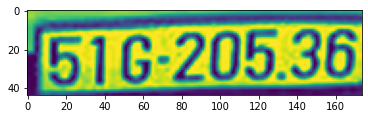

In [26]:
# convert into gray scale, chuyển ảnh về dạng xám
grayscale_resize_test_license_plate = cv2.cvtColor(resize_test_license_plate, cv2.COLOR_BGR2GRAY)
# grayscale_resize_test_license_plate = cv2.threshold(grayscale_resize_test_license_plate, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(grayscale_resize_test_license_plate) #vẽ ảnh đã chuyển về dạng xám lên figure
plt.show() #hiển thị figure

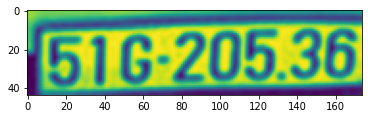

In [27]:
# khử nhiễu, noise removal, dùng thuật toán GaussianBlur
gaussian_blur_license_plate = cv2.GaussianBlur(grayscale_resize_test_license_plate, (5,5), 0)
plt.imshow(gaussian_blur_license_plate) #vẽ ảnh đã khử nhiễu lên figure
plt.show() #hiển thị figure

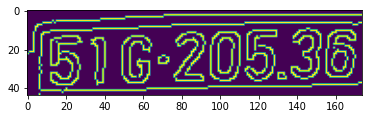

In [28]:
#phát hiện cạnh, edge detection, dùng thuật toán Canny
edged = cv2.Canny(gaussian_blur_license_plate, 30, 200)
plt.imshow(edged) #vẽ ảnh đã phát hiện cạnh lên figure
plt.show() #hiển thị figure

In [29]:
import pytesseract #import thư viện pytesseract
pytesseract.pytesseract.tesseract_cmd ="C:\\Program Files\\Tesseract-OCR\\tesseract.exe" # Path to tesseract.exe
# extract text from image
text = pt.image_to_string(gaussian_blur_license_plate, lang ='eng', config ='--oem 3 --psm 7 -c tessedit_char_whitelist=ABCDEFGHKLMNPSTUVXYZ0123456789') #gọi hàm image_to_string của thư viện pytesseract để nhận dạng ký tự trong ảnh, psm 7 là coi ảnh như 1 dòng text duy nhất, oem 3 là dùng thư viện LSTM, LSTM là một mạng nơ-ron sử dụng trong xử lý ngôn ngữ tự nhiên, còn lang là ngôn ngữ muốn nhận dạng, ở đây là tiếng anh
text = "".join(text.split()).replace(":", "").replace("-", "")
print(text) #in ra biển số xe đã nhận diện được dạng text

51G20536
